## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Aluno: Gustavo Negrão Ribeiro Souza.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze3.csv')


In [2]:
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,15,0,0,0,50.0,38.988883
1,12,1,0,0,46.0,75.139146
2,14,0,0,0,30.0,51.610290
3,45,0,0,1,18.0,73.879321
4,18,0,0,1,43.0,33.169897
...,...,...,...,...,...,...
1495,7,0,1,0,36.0,44.390893
1496,63,1,0,0,34.0,67.670916
1497,26,0,0,0,41.0,42.813928
1498,7,0,0,0,31.0,30.712867


In [3]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

## 1) Análise exploratória

Objetivo: avaliar associação entre a variável **nsneeze** e as demais


Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [4]:
df.nsneeze.value_counts()

nsneeze
10     61
6      57
8      54
7      51
11     50
       ..
466     1
209     1
87      1
144     1
82      1
Name: count, Length: 180, dtype: int64

### Variável resposta

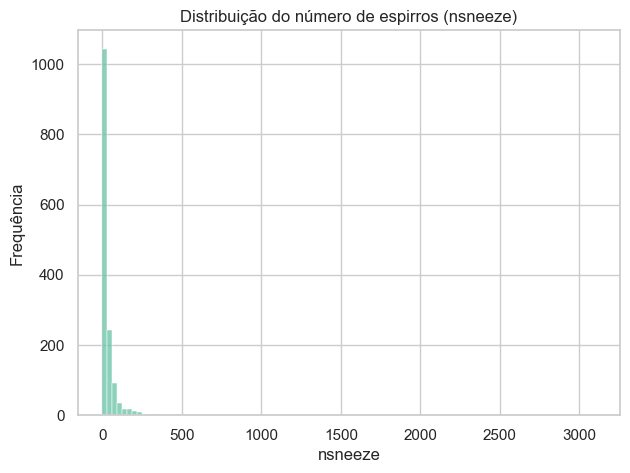

count    1500.000000
mean       43.789333
std       132.650537
min         0.000000
25%         9.000000
50%        18.000000
75%        39.000000
max      3102.000000
Name: nsneeze, dtype: float64
Assimetria: 13.831075765208666


In [5]:
sns.set(style="whitegrid", palette="Set2")

# Distribuição geral da variável resposta
plt.figure(figsize=(7,5))
sns.histplot(df["nsneeze"], kde=False, bins=100)
plt.title("Distribuição do número de espirros (nsneeze)")
plt.xlabel("nsneeze")
plt.ylabel("Frequência")
plt.show()

print(df["nsneeze"].describe())
print("Assimetria:", df["nsneeze"].skew())


### Função para comprar nsneeze com variáveis binárias

In [6]:
def box_violin(df, var):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(data=df, x=var, y="nsneeze", ax=axes[0])
    axes[0].set_title(f"Boxplot de nsneeze por {var}")

    sns.violinplot(data=df, x=var, y="nsneeze", ax=axes[1])
    axes[1].set_title(f"Violinplot de nsneeze por {var}")

    plt.show()

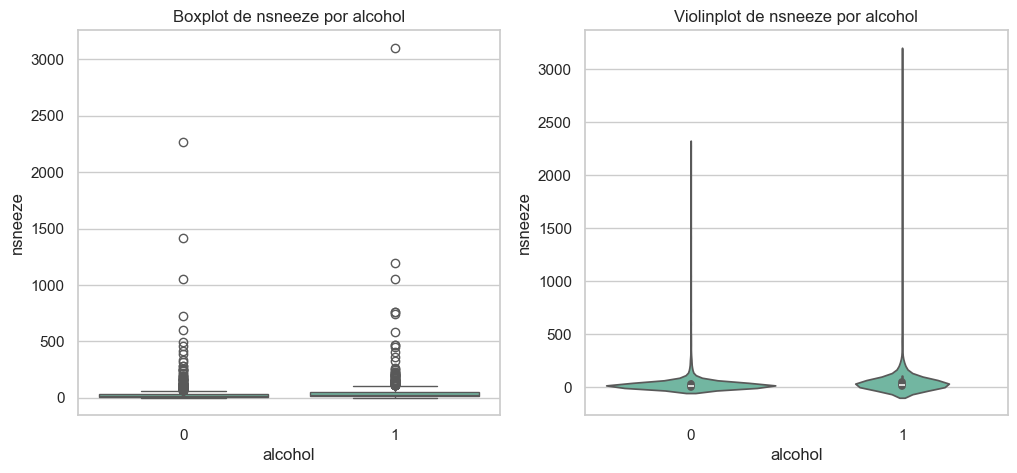

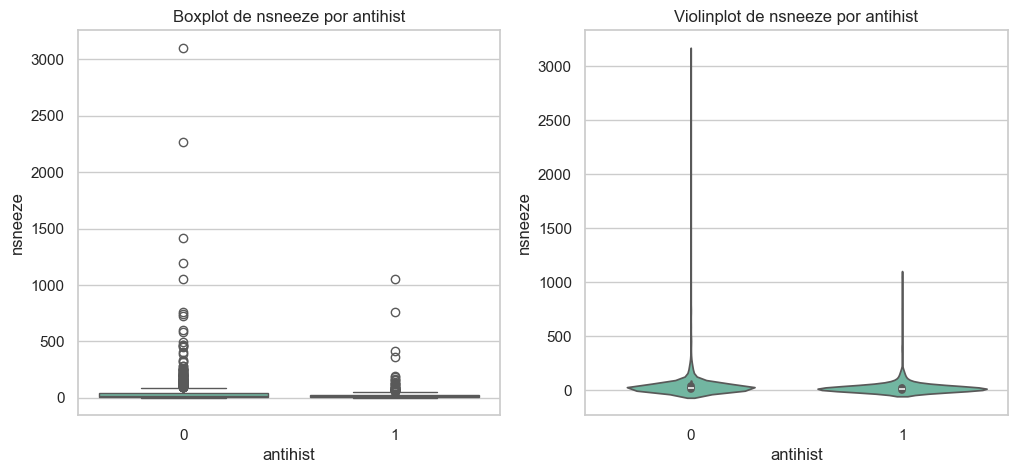

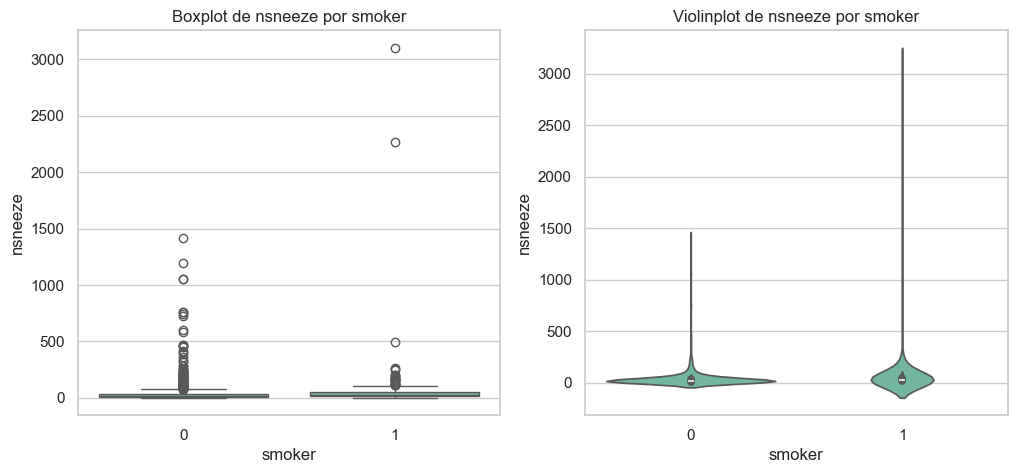

In [7]:
for b in ["alcohol", "antihist", "smoker"]:
    box_violin(df, b)

**Alcohol**

Em ambos os grupos (alcohol=0 e alcohol=1), a distribuição do número de espirros (nsneeze) apresenta:

- Muitos valores pequenos próximos de zero.

- Alguns valores extremamente altos (outliers), chegando acima de 3000 espirros.

- caráter assimétrico

**Antihist**

O grupo antihist == 1 apresenta mediana e distribuição menor em relação aos antihist == 0.
Dessa forma, o uso do antihist parece reduzir o número de grandes outliers e concentrando os dados em níveis mais baixo de número de espirros

**Smoker**

- Boxplot: fumantes têm mais outliers altos que não fumantes.

- Violin plot: a “perna” (cauda vertical) dos fumantes vai mais longe.

- Há uma densidade maior em valores moderados (ex.: 50–200 espirros) entre fumantes

- mediana bem próxima

### Associação de nsneeze com variáveis age e pollen

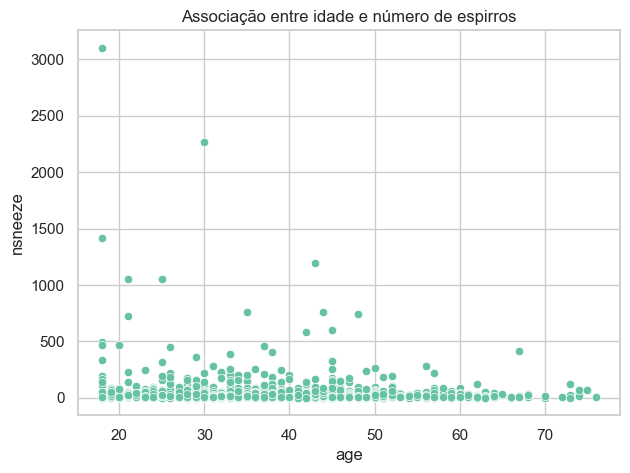

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="age", y="nsneeze")
#sns.regplot(data=df, x="age", y="nsneeze", scatter=False)
plt.title("Associação entre idade e número de espirros")
plt.show()

In [9]:
df.groupby("age")["nsneeze"].mean().reset_index().sort_values(by="nsneeze", ascending=False)

,age,nsneeze
12,30.0,101.848485
3,21.0,95.642857
7,25.0,83.629630
0,18.0,70.733333
49,67.0,69.857143
55,75.0,69.000000
15,33.0,61.456522
27,45.0,59.727273
30,48.0,57.368421
2,20.0,51.285714


In [10]:
df.groupby("age")["nsneeze"].median().reset_index().sort_values(by="nsneeze", ascending=False)

,age,nsneeze
55,75.0,69.0
40,58.0,42.5
54,74.0,32.0
6,24.0,31.5
1,19.0,29.0
47,65.0,26.5
0,18.0,24.0
32,50.0,24.0
3,21.0,23.5
50,68.0,23.5


**Espirros por idade**

- Pelo scatterplot: observa-se que os número de espirros mais aberrantes se concentram na idade entre 18 e 30, principalmente.

- Pelo groupby: Quando se analisa a média e a mediana de espirros por idade, nota-se que , dentro dos maiores valores, há tantos pessoas mais velhas (70-80) quanto mais novas (18-30)

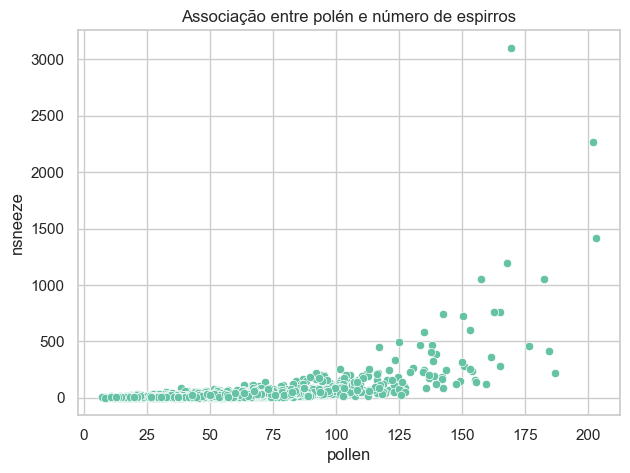

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="pollen", y="nsneeze")
#sns.regplot(data=df, x="pollen", y="nsneeze", scatter=False, color="black")
plt.title("Associação entre polén e número de espirros")
plt.show()

In [12]:
df.groupby("nsneeze")["pollen"].mean().reset_index().sort_values(by="nsneeze", ascending=False)

,nsneeze,pollen
179,3102,169.429012
178,2271,201.994822
177,1415,202.922690
176,1196,167.730913
175,1053,157.585766
...,...,...
4,4,34.602074
3,3,34.151759
2,2,30.788371
1,1,32.941828


**Pollen**

Aqui nota-se algo bem interessante... O aumento da concentração de pollen indica também um aumento do número de espirros

## 2) Ajuste de um modelo de Poisson

Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [13]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [15]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson(link=sm.families.links.log()) 
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12160.
Date:                Sun, 30 Nov 2025   Deviance:                       17173.
Time:                        23:59:18   Pearson chi2:                 1.77e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5480      0.016  

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


**Significância:**
Neste modelo, todas as variáveis são significativas para nível de significância igual a 0.05, uma vez que P > |z|== 0 para todas as variáveis 

**Interpretação:**

No modelo de Poisson com link log, cada coeficiente representa: **o log da razão de taxas (log-rate ratio)**, mantendo todas as outras variáveis constantes.

E a interpretação prática é: **$e^β −1$** 

- para variáveis quantitativas: representa o percentual de mudança esperada no número médio de espirros quando aquela variável aumenta 1 unidade.

- para variáveis binárias: representa o percentual de espirros de X = 1 comparado a de X = 0.

    Por exemplo, percentual 22% representa que indivíduos que consumiram álcool (X == 1)têm , em média, 22% mais espirros, comparado a quem não consumiu (X == 0) 

In [16]:
# extrai os coeficientes
coef = ajuste_pois.params

# calcula exp(beta)
exp_beta = np.exp(coef)

# calcula exp(beta) - 1, interpretação percentual
exp_beta_minus_1 = exp_beta - 1

# junta tudo em uma tabela
interpretacao = pd.DataFrame({
    "Coef (β)": coef,
    "exp(β)": exp_beta,
    "exp(β)-1": exp_beta_minus_1,
    "Impacto (%)": 100 * exp_beta_minus_1
})
interpretacao

,Coef (β),exp(β),exp(β)-1,Impacto (%)
Intercept,1.547951,4.701828,3.701828,370.182846
C(alcohol)[T.1],0.630862,1.879231,0.879231,87.923065
C(antihist)[T.1],-0.500596,0.606169,-0.393831,-39.383055
C(smoker)[T.1],0.521093,1.683867,0.683867,68.386728
age,-0.013470,0.986621,-0.013379,-1.337923
pollen,0.030474,1.030943,0.030943,3.094313


- Indivíduos que consumiram álcool apresentam, em média, um aumento de aproximadamente 87,9% no número esperado de espirros, em comparação com indivíduos que não consumiram álcool.
Isso sugere que o álcool está positivamente associado ao aumento da frequência de espirros.

- O uso de medicamentos antialérgicos está associado a uma redução de cerca de 39,4% no número esperado de espirros, em comparação com pessoas que não usam o medicamento.
Este resultado é coerente com o efeito farmacológico esperado desses medicamentos, que reduzem sintomas alérgicos.

- Pessoas fumantes apresentam um aumento de aproximadamente 68,4% no número esperado de espirros, comparadas a não fumantes.
Esse efeito positivo sugere que o tabagismo pode contribuir para irritação das vias aéreas, aumentando a ocorrência de espirros.

- Para cada aumento de um ano de idade, ocorre uma redução média de aproximadamente 1,34% no número esperado de espirros, mantendo todas as outras variáveis fixas.
Embora o efeito seja pequeno, sugere que pessoas mais velhas espirram um pouco menos, possivelmente por menor reatividade alérgica.

- Cada unidade adicional na medida de pólen está associada a um aumento de cerca de 3,1% no número esperado de espirros.
Esse resultado indica que ambientes com maior concentração de pólen tendem a gerar mais espirros, como esperado fisiologicamente.

## 3) Verficiar se há indícios de superdispersão no modelo de Poisson ajustado 


Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


A superdispersão ocorre quando :
- $Var(Y) > E(Y)$
- o modelo de Poisson impõe: $Var(Y) = E(Y)$

### método 1 : Índice de Superdispersão (resíduo deviance)

In [17]:
deviance = ajuste_pois.deviance
df_res = ajuste_pois.df_resid
phi = deviance / df_res

print("Índice de dispersão (φ):", phi)


Índice de dispersão (φ): 11.494312142622269


**Interpretação:** Como o φ no método 1 é > 2, tem-se sinais de superdispersão

### método 2: Envelope de resíduos

In [18]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

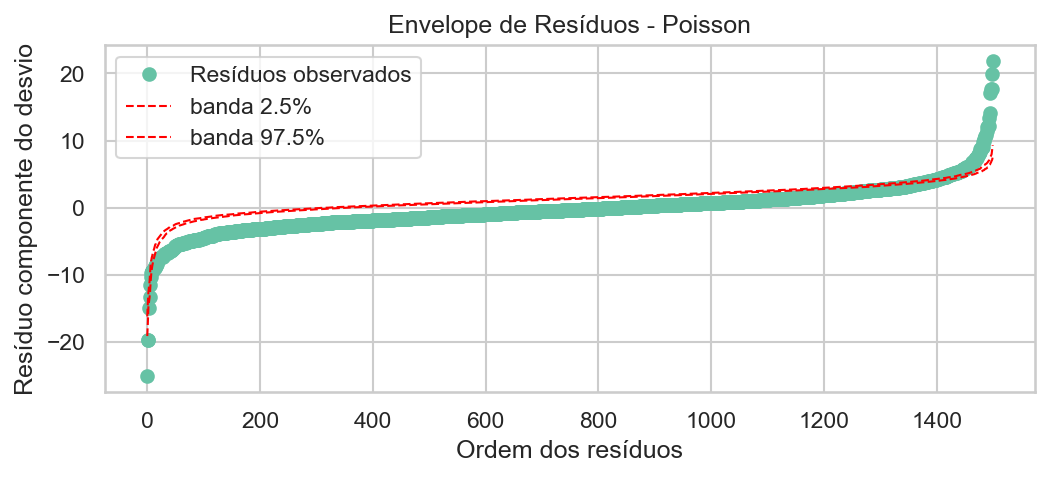

In [19]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**Interpretação:**

- Se muitos pontos ficam fora da banda simulada → indício de superdispersão.

- Se os resíduos observados são muito maiores que a banda → superdispersão forte.

Portanto, por essa metodologia há sinais de superdispersão, uma vez que muitos pontos estão fora da banda simulada

## 4) Ajustar um modelo Binomial negativo

Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5795.8
Date:                Sun, 30 Nov 2025   Deviance:                       1912.2
Time:                        23:59:19   Pearson chi2:                 1.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9973
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5646      0.050  

### Comparar AIC e Deviance

Interpretação esperada:

- Menor deviance → melhor ajuste (com o mesmo número de parâmetros).

- Menor AIC → modelo mais parcimonioso.

In [21]:
print("---- Comparação ----")
print("Poisson - Deviance:", ajuste_pois.deviance)
print("NB      - Deviance:", ajuste_nb.deviance)
print()
print("Poisson - AIC:", ajuste_pois.aic)
print("NB      - AIC:", ajuste_nb.aic)


---- Comparação ----
Poisson - Deviance: 17172.50234107767
NB      - Deviance: 1912.2492347777072

Poisson - AIC: 24332.006068086797
NB      - AIC: 11603.652772045


Os resultados indicam claramente que há superdispersão nos dados: o modelo de Poisson apresenta uma deviance extremamente elevada e um AIC muito maior, refletindo que ele não consegue capturar a variabilidade do número de espirros.

Ao ajustar a Binomial Negativa, a deviance cai de 17172 para 1912 e o AIC reduz de 24332 para 11604, evidenciando que esse modelo oferece um ajuste muito mais adequado.

Portanto, o modelo de Poisson é inadequado, enquanto a Binomial Negativa é o modelo correto para descrever o número de espirros entre os dois.

### Gráfico de resíduos componentes do desvio

In [22]:
def plot_residuos(model, titulo):
    resid = model.resid_deviance.copy()
    fitted = model.fittedvalues.copy()

    plt.scatter(fitted, resid, alpha=0.5)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel("Valores ajustados")
    plt.ylabel("Resíduos (deviance)")
    plt.title(titulo)
    plt.grid(True)

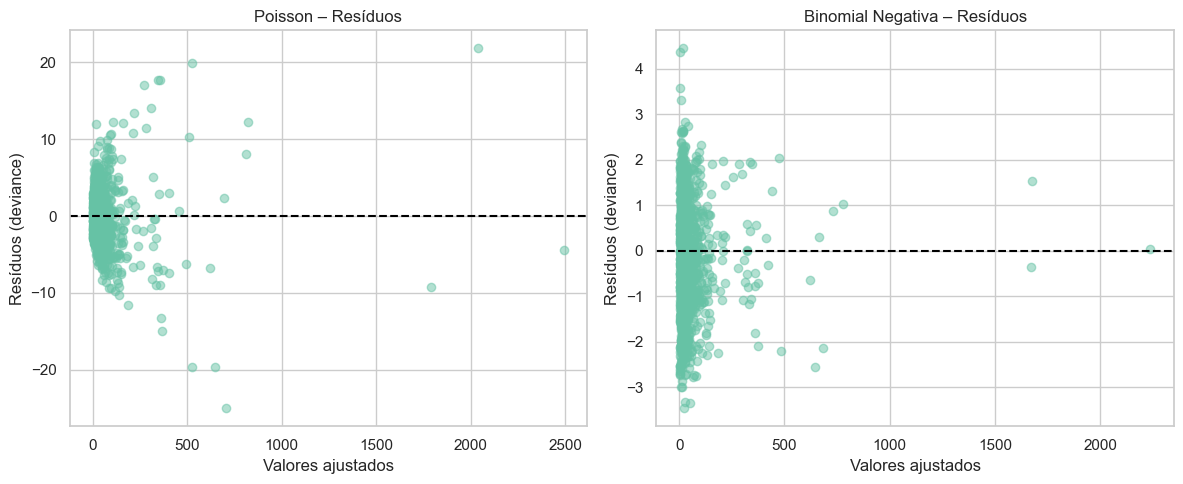

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_residuos(ajuste_pois, "Poisson – Resíduos")

plt.subplot(1,2,2)
plot_residuos(ajuste_nb, "Binomial Negativa – Resíduos")

plt.tight_layout()
plt.show()


**Poisson:**

- Elevada dispersão vertical dos resíduos, especialmente para valores ajustados maiores.

- Presença de valores extremamente altos e baixos de resíduos (tanto positivos quanto negativos), indicando resíduos muito afastados da linha zero.

- Padrão de funil, no qual a variabilidade dos resíduos aumenta conforme os valores ajustados crescem. → Esse padrão sugere heterocedasticidade, o que é incompatível com a suposição da Poisson de que média = variância.

- Existência de outliers marcantes, com resíduos superiores a 20 e inferiores a –20, reforçando que o modelo está subajustando a variabilidade real dos dados.

**Binomial Negativa:**
- Menor amplitude dos resíduos, concentrados aproximadamente entre –3 e 5.

- Resíduos mais centralizados na linha zero, sugerindo melhor equilíbrio entre valores previstos e observados.

- Menos outliers severos e menor variabilidade vertical, indicando um ajuste mais estável.

- Pequena assimetria residual, porém dentro do comportamento esperado em modelos de contagem com alta variabilidade.

## 5) Estime e interprete o efeito médio marginal



Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [24]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


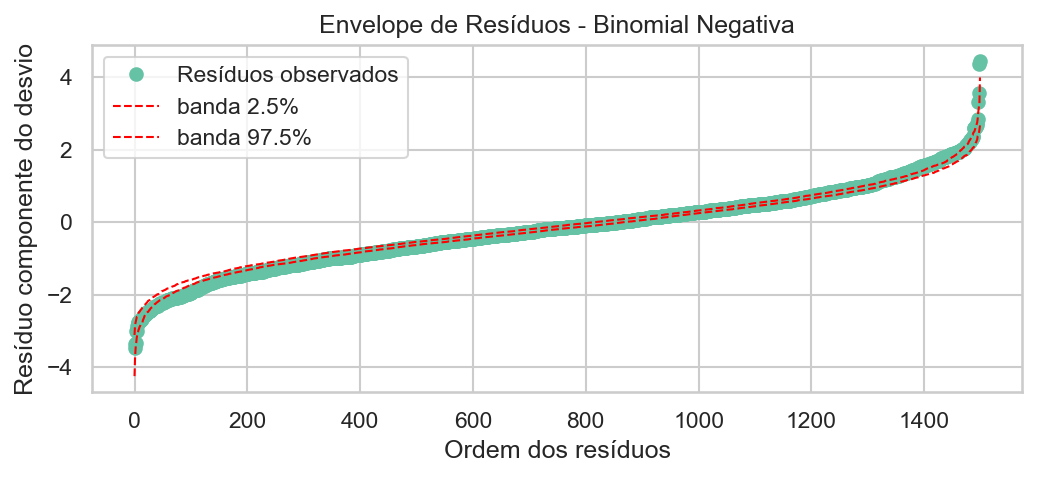

In [25]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [26]:
efeitos_marginais = ajuste_nb.get_margeff(at='overall', dummy=True)
print(efeitos_marginais.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     25.4313      1.493     17.032      0.000      22.505      28.358
C(antihist)[T.1]   -20.5319      1.159    -17.720      0.000     -22.803     -18.261
C(smoker)[T.1]      22.0632      1.948     11.326      0.000      18.245      25.881
age                 -0.4559      0.046     -9.824      0.000      -0.547      -0.365
pollen               1.2750      0.045     28.533      0.000       1.187       1.363


**Efeito marginal do alcool:**

Indivíduos que consomem álcool apresentam, em média, 25,4 espirros a mais do que indivíduos que não consomem, mantendo todas as outras variáveis constantes.

- Efeito altamente significativo (p < 0.05).

- Sugere que o consumo de álcool está associado a maior irritação de vias aéreas ou potencial sensibilização alérgica.

**Efeito marginal:**

- O uso do anti-histamínico reduz o número médio de espirros em aproximadamente 20 espirros, em comparação aos que não usam.

- Efeito significativo (p < 0.05).

- Compatível com o mecanismo farmacológico esperado.

## 6) Treinamento e teste  de modelos

Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
# 1) Defina fórmula e semente
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# 2) Separar treino (80%) e teste (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [32]:
# 3) Construir matrizes de desenho (garante mesmas colunas p/ ambos)
y_train, X_train = dmatrices(formula, data=train_df, return_type='dataframe')
y_test,  X_test  = dmatrices(formula, data=test_df,  return_type='dataframe')

In [33]:
# y_* são colunas 2D; convertê-las para 1D
y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)

In [34]:
# 4) Ajustar modelo Poisson (GLM) no conjunto de treinamento
pois_train = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [35]:
# 5) Ajustar modelo Binomial Negativa:
#  estimar o alpha no train set
nb_discrete = sm.NegativeBinomial(y_train, X_train).fit(disp=False)  # disp=False para silêncio

In [36]:
# 6) Predições (esperança) no conjunto de teste
#    ambos os modelos aceitam X_test porque usamos dmatrices (mesmas colunas)
pred_pois_test = pois_train.predict(X_test)    # previsão da média lambda
pred_nb_test   = nb_discrete.predict(X_test)   # previsão da média do NB

In [37]:
# 7) Métricas: EQM (MSE) e EAM (MAE)
mse_pois = mean_squared_error(y_test, pred_pois_test)
mae_pois = mean_absolute_error(y_test, pred_pois_test)

mse_nb = mean_squared_error(y_test, pred_nb_test)
mae_nb = mean_absolute_error(y_test, pred_nb_test)

In [38]:
# 8) Exibir resumo
print("\n--- Desempenho fora da amostra (teste) ---")
print(f"Poisson  - EQM (MSE): {mse_pois:.4f}   | EAM (MAE): {mae_pois:.4f}")
print(f"NegBin   - EQM (MSE): {mse_nb:.4f}   | EAM (MAE): {mae_nb:.4f}")


--- Desempenho fora da amostra (teste) ---
Poisson  - EQM (MSE): 4761.2232   | EAM (MAE): 21.0667
NegBin   - EQM (MSE): 3132.8859   | EAM (MAE): 18.4942


O desempenho no teste indica que as previsões da Binomial Negatuva ficam, em média, mais próximas dos valores observados e cometem erros quadráticos e absolutos menores.

Assim, tanto pela qualidade de ajuste (desvio e AIC) quanto pela validação preditiva, a Binomial Negativa é o modelo mais apropriado para descrever e prever o número de espirros.

## 7) Previsão do número esperado de espirros

Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [39]:
# definição dos valores de pollen para previsão

pollen_baixa = df["pollen"].quantile(0.05)   # Exemplo: baixa concentração
pollen_alta  = df["pollen"].quantile(0.95)   # Exemplo: alta concentração

In [40]:
novos_individuos = pd.DataFrame({
    "alcohol": [0, 1],
    "antihist": [1, 0],
    "smoker": [0, 1],
    "age": [30, 50],
    "pollen": [pollen_baixa, pollen_alta]
})

In [41]:
novos_individuos

,alcohol,antihist,smoker,age,pollen
0,0,1,0,30,20.167120
1,1,0,1,50,116.811008


In [42]:
predicoes = ajuste_nb.predict(novos_individuos)

In [43]:
predicoes

0      3.575067
1    248.619651
dtype: float64